### Student Name: Mohit Patil
### Registered E-mail ID: mohitz4418@gmail.com 


# Bike Sharing Assignment

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

## Step 1 : Import neccesary libraries and warnings

In [1]:
# import neccesary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# import warnings.

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Reading and Understanding the dataset.

In [3]:
# read the days.csv file.

days = pd.read_csv("C:\\Users\\Mohit'z\\Desktop\\Upgrad\\Bike Sharing Assignment\\day.csv")

In [4]:
# Check top 5 rows of dataset.

days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check shape of dataset.

days.shape

(730, 16)

In [6]:
# Check details of dataset columns.

days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Describe the dataset.

days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step  : Data Visualisation.

### 3.1. Perform EDA to understand various variables.

### 3.1.1. Find the percentage of missing values in each column. 

In [8]:
# Finding the percentage of null values in each column 

days_null_count = round(days.isnull().sum() * 100 / len(days),2) 
days_null_count

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

We can see there are no null values in any column.

### 3.1.2. Replace categorical column with their corresponding categories.

In [9]:
# Replace 'season' column values with their corresponding categories.

days['season'].replace(to_replace = 1, value = "Spring", inplace = True)
days['season'].replace(to_replace = 2, value = "Summer", inplace = True)
days['season'].replace(to_replace = 3, value = "Fall", inplace = True)
days['season'].replace(to_replace = 4, value = "Winter", inplace = True)
print(days.season.unique())

['Spring' 'Summer' 'Fall' 'Winter']


In [10]:
# Replace 'mnth' column values with their corresponding categories.

days['mnth'].replace(to_replace = 1, value = "January", inplace = True)
days['mnth'].replace(to_replace = 2, value = "February", inplace = True)
days['mnth'].replace(to_replace = 3, value = "March", inplace = True)
days['mnth'].replace(to_replace = 4, value = "April", inplace = True)
days['mnth'].replace(to_replace = 5, value = "May", inplace = True)
days['mnth'].replace(to_replace = 6, value = "June", inplace = True)
days['mnth'].replace(to_replace = 7, value = "July", inplace = True)
days['mnth'].replace(to_replace = 8, value = "August", inplace = True)
days['mnth'].replace(to_replace = 9, value = "September", inplace = True)
days['mnth'].replace(to_replace = 10, value = "October", inplace = True)
days['mnth'].replace(to_replace = 11, value = "November", inplace = True)
days['mnth'].replace(to_replace = 12, value = "December", inplace = True)
print(days.mnth.unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [11]:
# Replace 'weathersit' column values with their corresponding categories.

days['weathersit'].replace(to_replace = 1, value = "Clear", inplace = True)
days['weathersit'].replace(to_replace = 2, value = "Misty_Cloudy", inplace = True)
days['weathersit'].replace(to_replace = 3, value = "Heavy Snow Rain", inplace = True)
print(days.weathersit.unique())

['Misty_Cloudy' 'Clear' 'Heavy Snow Rain']


In [12]:
# Replace 'weekday' column values with their corresponding categories.

days['weekday'].replace(to_replace = 0, value = "Sunday", inplace = True)
days['weekday'].replace(to_replace = 1, value = "Monday", inplace = True)
days['weekday'].replace(to_replace = 2, value = "Tuesday", inplace = True)
days['weekday'].replace(to_replace = 3, value = "Wednesday", inplace = True)
days['weekday'].replace(to_replace = 4, value = "Thursday", inplace = True)
days['weekday'].replace(to_replace = 5, value = "Friday", inplace = True)
days['weekday'].replace(to_replace = 6, value = "Saturday", inplace = True)
print(days.weekday.unique())

['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


### 3.1.3. For Numericals columns check for outliers & add observation.  

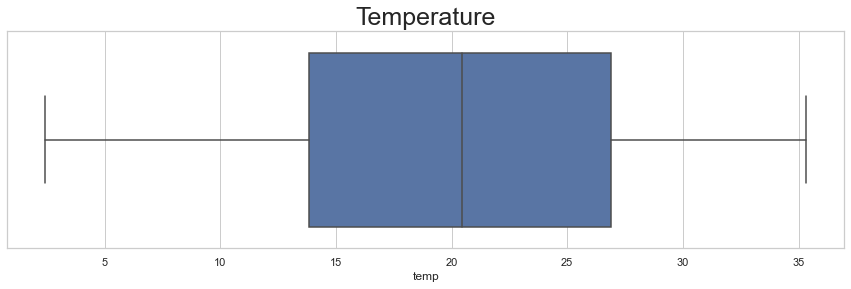

In [13]:
# Check outliers for "temp" column.

plt.figure(figsize = [15,4])
sns.set(style="whitegrid")
sns.boxplot(x = days['temp'])
plt.title("Temperature", fontsize = 25)
plt.show()

Observation :

1. There are no outliers in temp column.
2. Mostly temperature lies between approximately 14 to 28.

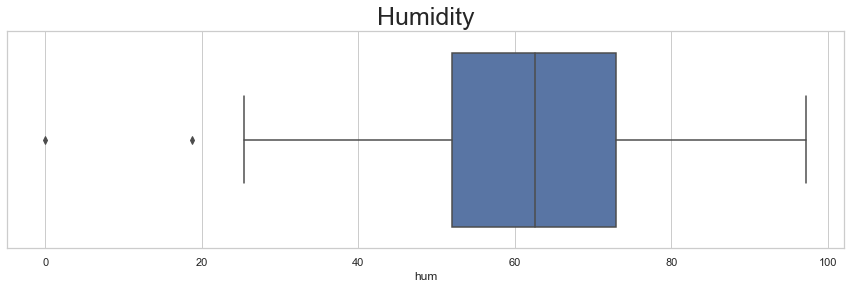

In [14]:
# Check outliers for "hum" column.

plt.figure(figsize = [15,4])
sns.set(style="whitegrid")
sns.boxplot(x = days['hum'])
plt.title("Humidity", fontsize = 25)
plt.show()

Observation :

1. There are some outliers in hum column 
2. Most of the humidity ratio lies between 50 to 80.

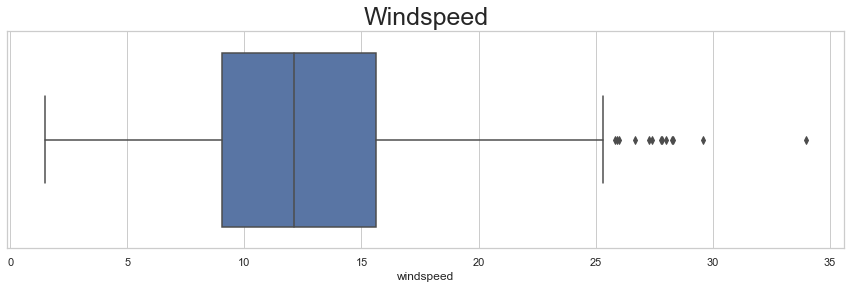

In [15]:
# Check outliers for "windspeed" column.

plt.figure(figsize = [15,4])
sns.set(style="whitegrid")
sns.boxplot(x = days['windspeed'])
plt.title("Windspeed", fontsize = 25)
plt.show()

Observation :

1. There are ouliers in windspeed column.
2. Most of the windspeed values between 8 to 18.

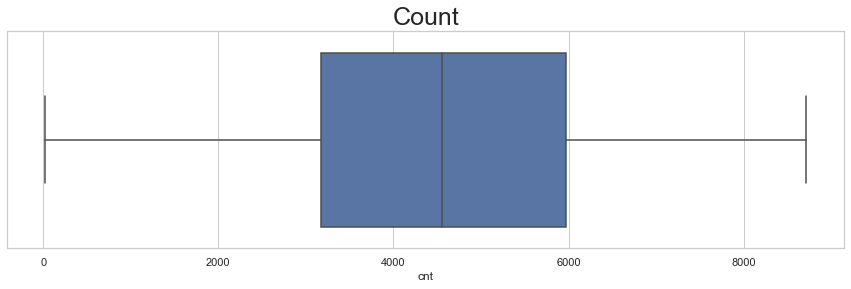

In [16]:
# Check outliers for "cnt" column.

plt.figure(figsize = [15,4])
sns.set(style="whitegrid")
sns.boxplot(x = days['cnt'])
plt.title("Count", fontsize = 25)
plt.show()

Observation :

1. There are no outliers in cnt column.

### 3.1.4. Univariate analysis for categorical variables. 

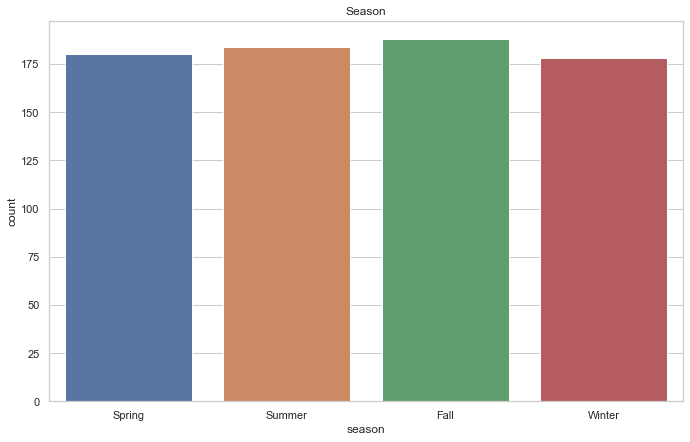

In [17]:
# Univariate analysis for "Season" column.

plt.figure(figsize = (25, 7))
plt.subplot(1, 2, 1)
sns.countplot(days['season'])
plt.title("Season")
plt.show()

Observation :

1. All categories in season column has equal values.

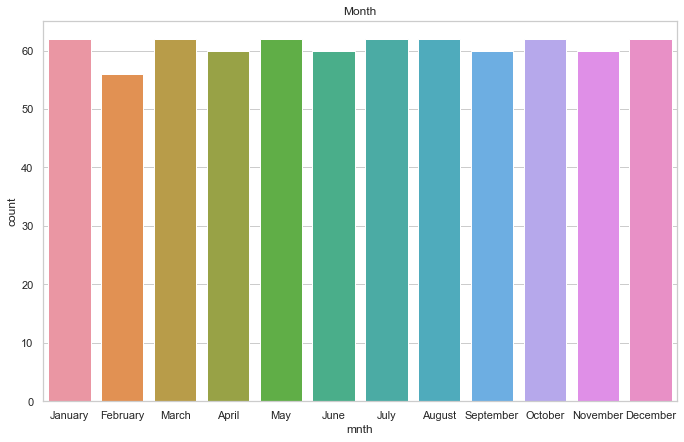

In [18]:
# Univariate analysis for "mnth" column.

plt.figure(figsize = (25, 7))
plt.subplot(1, 2, 1)
sns.countplot(days['mnth'])
plt.title("Month")
plt.show()

Observation :

1. every category in Month column has almost equal values.

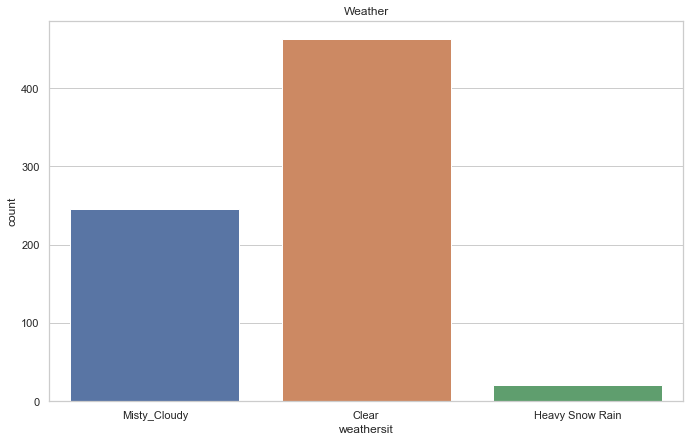

In [19]:
# Univariate analysis for "weathersit" column.

plt.figure(figsize = (25, 7))
plt.subplot(1, 2, 1)
sns.countplot(days['weathersit'])
plt.title("Weather")
plt.show()

Observation :

1. In weathersit column most values belongs to clear category follwed by Misty_Cloudy and Heavy snow rain has lowest values.

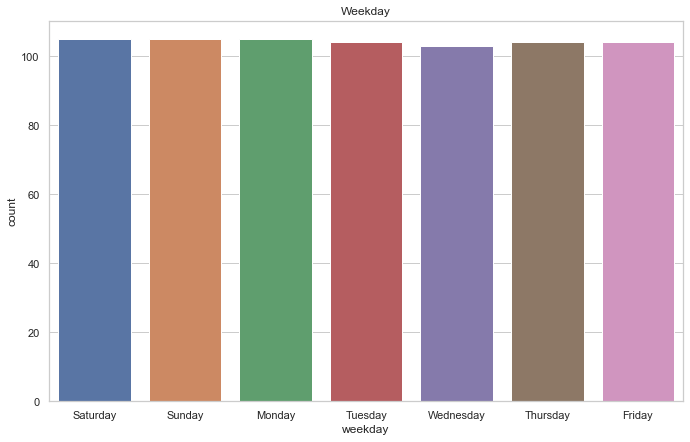

In [20]:
# Univariate analysis for "weekday" column.

plt.figure(figsize = (25, 7))
plt.subplot(1, 2, 1)
sns.countplot(days['weekday'])
plt.title("Weekday")
plt.show()

Observation :

1. weekday column has equal values for each category in it.

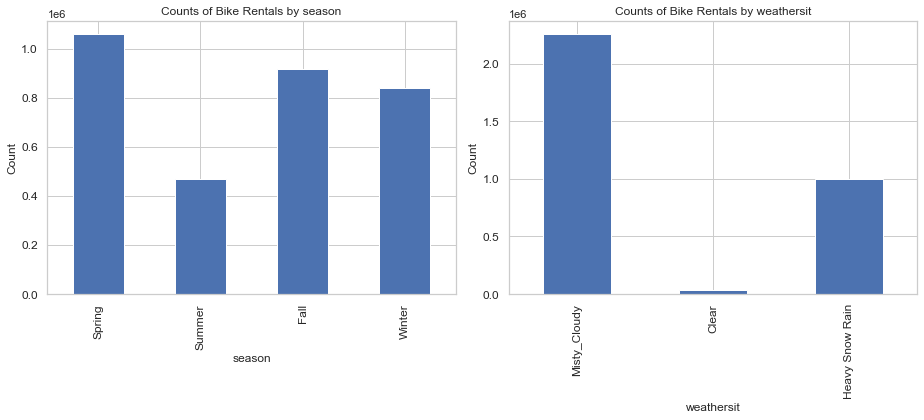

In [21]:
# Plotting graph for Rental count on Season and Weathersit.

f,(ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
ax1 = days[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar', legend = False, title ="Counts of Bike Rentals by season", stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['Spring','Summer','Fall','Winter'])

ax2 = days[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar', legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(["Misty_Cloudy", "Clear", "Heavy Snow Rain"])

f.tight_layout()

### 3.1.5. Univariate analysis for numerical variable.

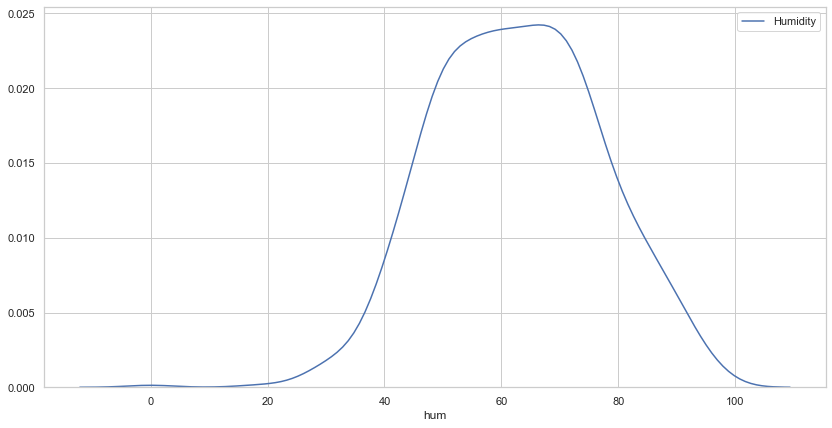

In [22]:
# Univariate analysis for "hum" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(days['hum'], hist = False, label = "Humidity")
plt.show()

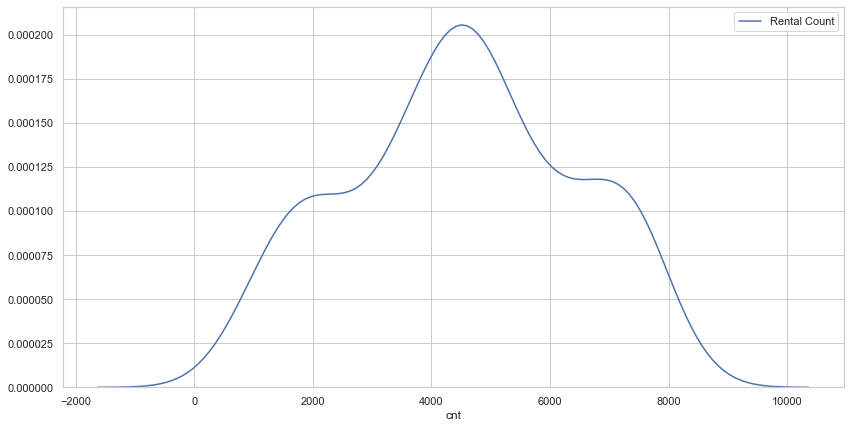

In [23]:
# Univariate analysis for "cnt" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(days['cnt'], hist = False, label = "Rental Count")
plt.show()

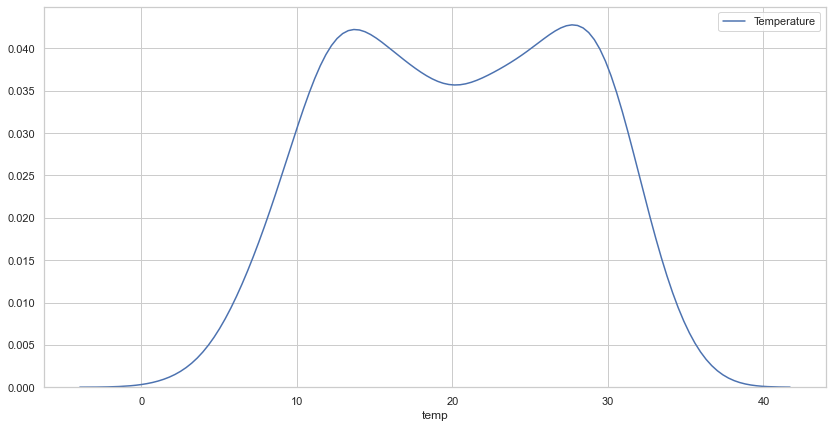

In [24]:
# Univariate analysis for "temp" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(days['temp'], hist = False, label = "Temperature")
plt.show()

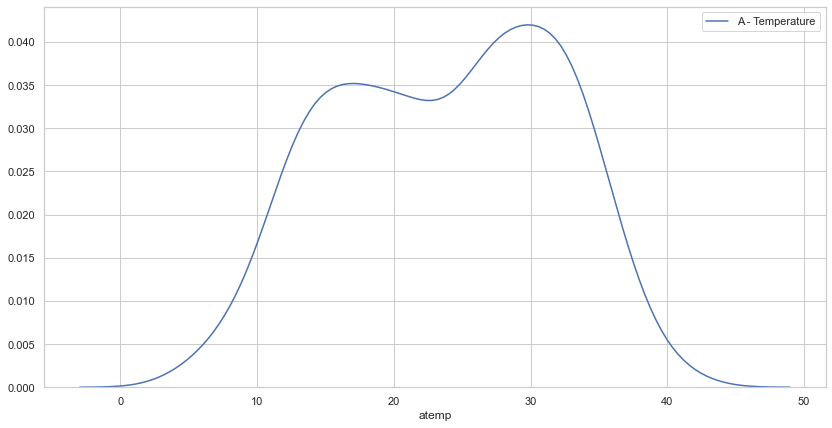

In [25]:
# Univariate analysis for "atemp" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(days['atemp'], hist = False, label = "A - Temperature")
plt.show()

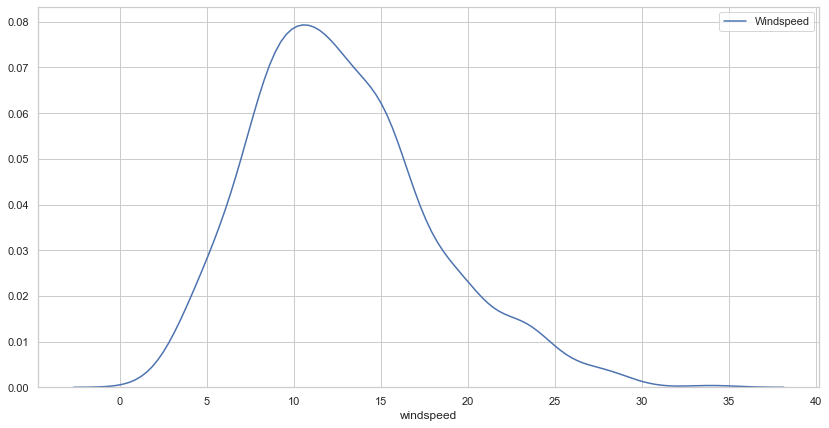

In [26]:
# Univariate analysis for "windspeed" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(days['windspeed'], hist = False, label = "Windspeed")
plt.show()

### 3.1.6. Bivariate analysis for continous - continous variables.

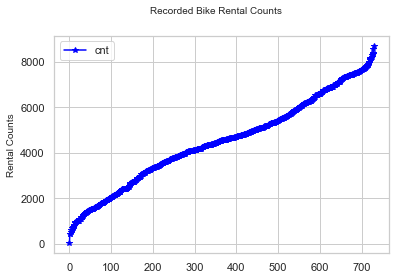

In [27]:
# Ploting a graph for Rental counts.

fig, ax = plt.subplots(1)
ax.plot(sorted(days['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)
plt.show()

Observation :

1. Sorted counts of the bike rentals reveal that the majority of the rentals happen in the 0 - 8000 ranges, values higher than those are rare or outliers

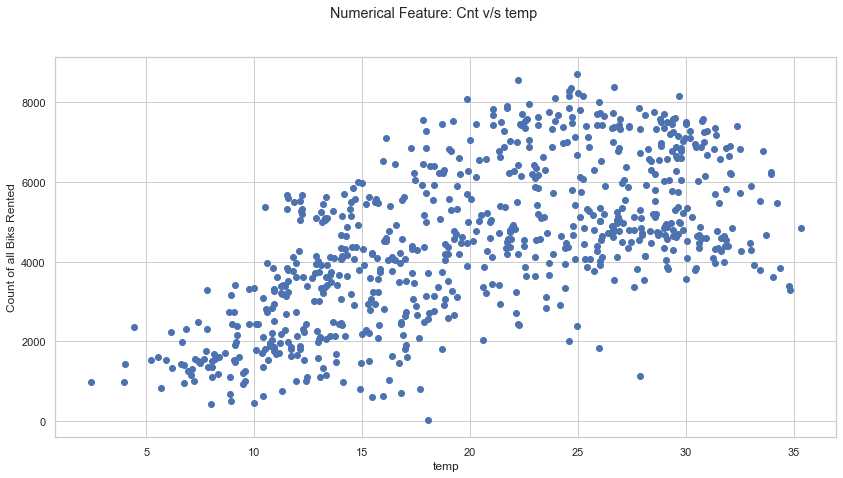

In [28]:
# Univariate analysis for "temp" continous variable.

plt.figure(figsize = (14, 7))
plt.scatter(days['temp'], days['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')
plt.show()

Observation :
    
1. As per the scatter plot we can see their is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented

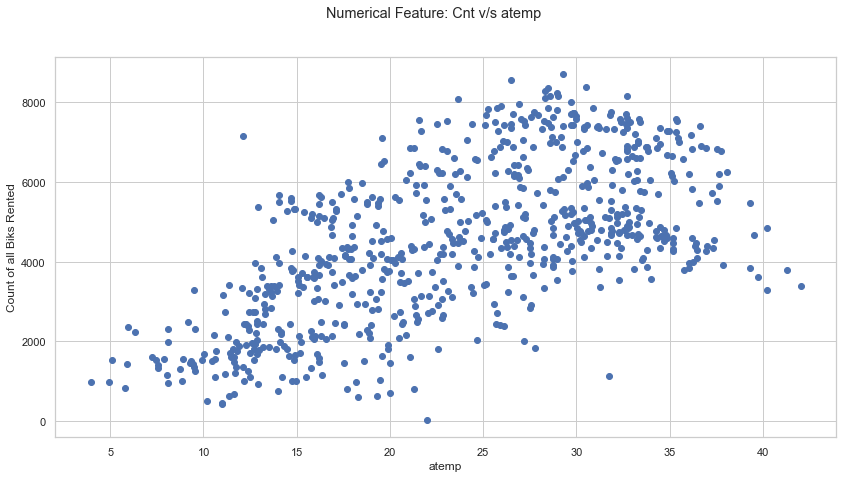

In [29]:
# Univariate analysis for "atemp" continous variable.

plt.figure(figsize = (14, 7))
plt.scatter(days['atemp'], days['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')
plt.show()

Observation :

1. As we can see both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. to keep things clean we can drop the 'atemp' feature.

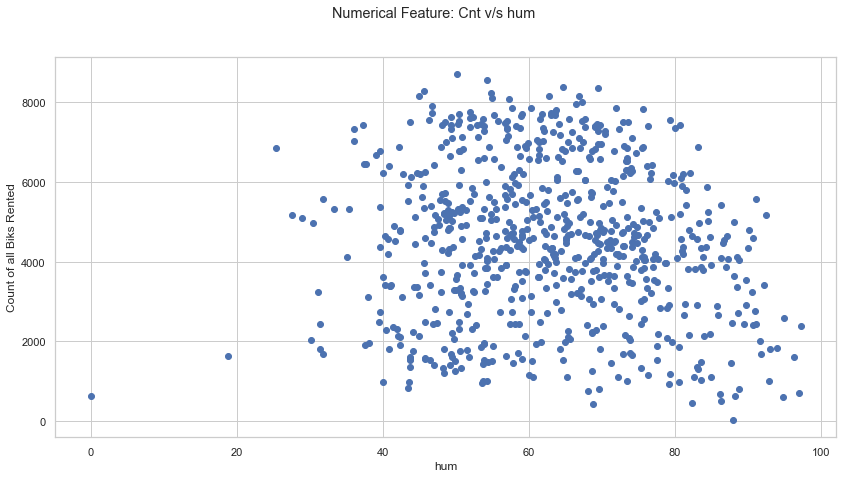

In [30]:
# Univariate analysis for "hum" continous variable.

plt.figure(figsize = (14, 7))
plt.scatter(days['hum'], days['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')
plt.show()

Observation :

1. For 'hum' or humidity looks like a big blob throught the edges so show some sparseness.

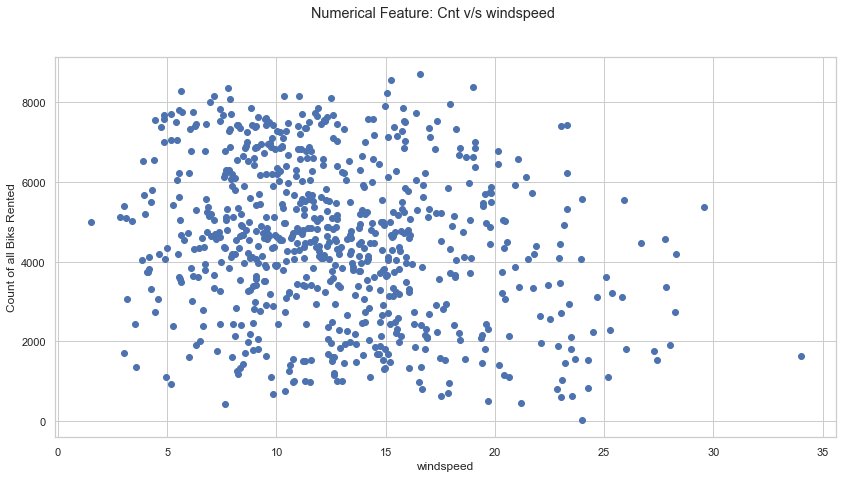

In [31]:
# Univariate analysis for "windspeed" continous variable.

plt.figure(figsize = (14, 7))
plt.scatter(days['windspeed'], days['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')
plt.show()

Observation :

1. For feature 'windspeed' shows inverse relationship with rentals
2. For conculsion we can say too much wind and bike rentals dont seem to mix

### 3.1.7. Bivariate analysis for continous - categorical variables.

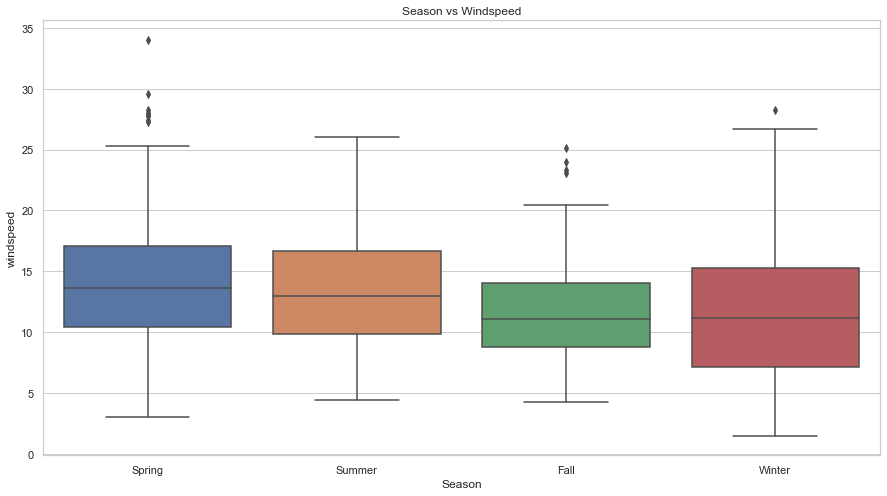

In [32]:
# Bivariate analysis for "Season" "windspeed" variables.

plt.figure(figsize = (15, 8))
sns.boxplot(x = "season", y = "windspeed", data = days)
plt.xlabel("Season")
plt.ylabel("windspeed")
plt.title("Season vs Windspeed")
plt.show()

Observation:

1. The Spring, Fall and Winter has some outliers.
2. Summer has no outliers.

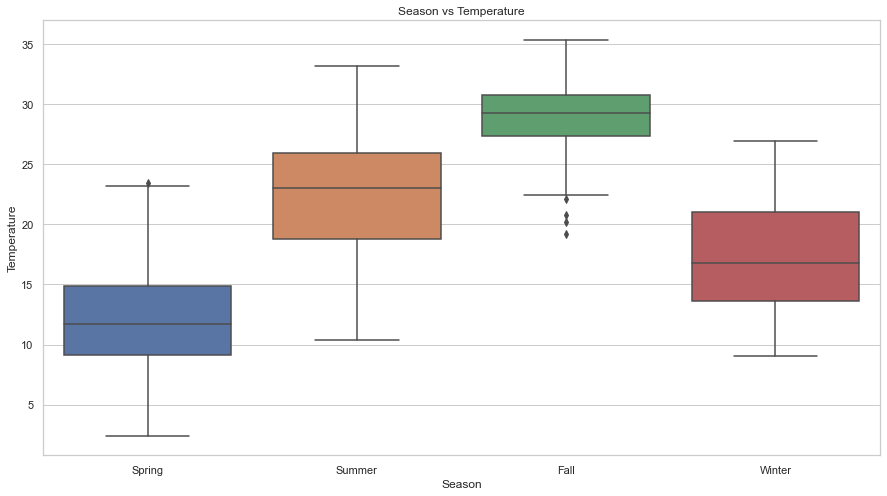

In [33]:
# Bivariate analysis for "season" "temp" variables.

plt.figure(figsize = (15, 8))
sns.boxplot(x = "season", y = "temp", data = days)
plt.xlabel("Season")
plt.ylabel("Temperature")
plt.title("Season vs Temperature")
plt.show()

Observation:

1. Fall category has outliers.
2. Max temperature is align in fall season.

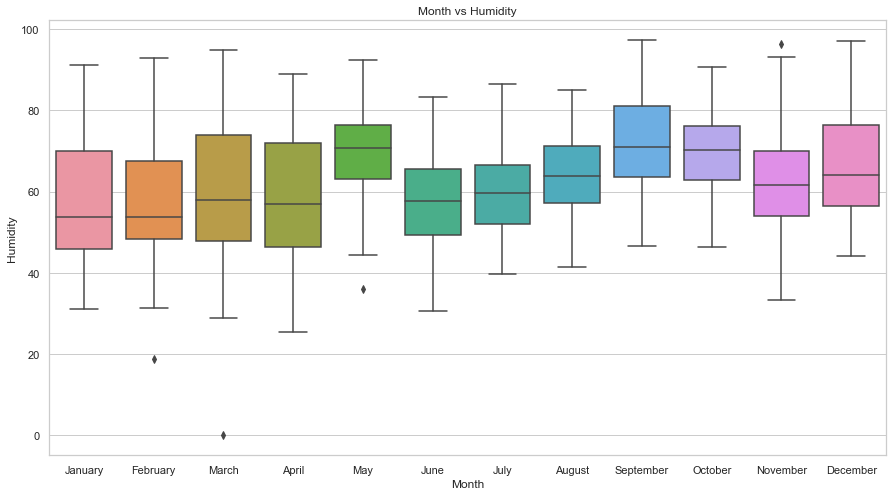

In [34]:
# Bivariate analysis for "mnth" "hum" variables.

plt.figure(figsize = (15, 8))
sns.boxplot(x = "mnth", y = "hum", data = days)
plt.xlabel("Month")
plt.ylabel("Humidity")
plt.title("Month vs Humidity")
plt.show()

Observation :

1. February, March, May and October has very few outliers.
2. Humiduty ratio is not varies to much in any month.

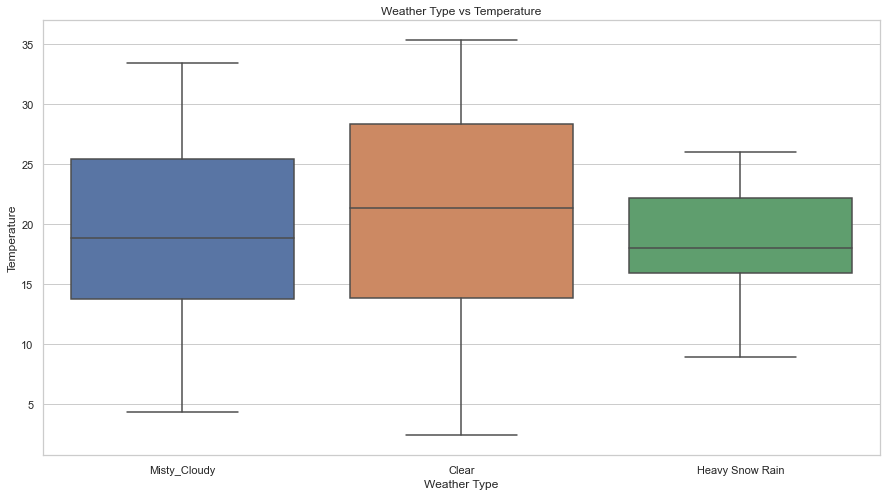

In [35]:
# Bivariate analysis for "weathersit" and "temp" variables.

plt.figure(figsize = (15, 8))
sns.boxplot(x = "weathersit", y = "temp", data = days)
plt.xlabel("Weather Type")
plt.ylabel("Temperature")
plt.title("Weather Type vs Temperature")
plt.show()

Observation :

1. Mostly the temperature in all whether type lies in approximately 15 to 30.

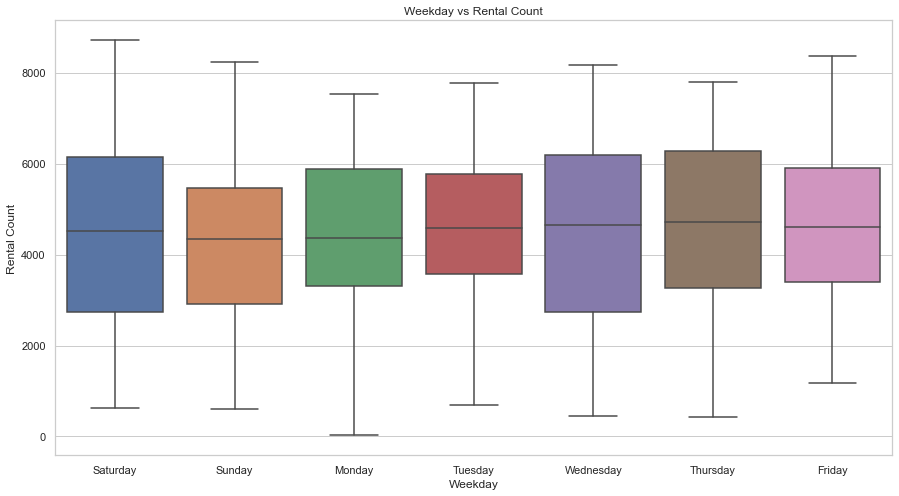

In [36]:
# Bivariate analysis for "weekday" "cnt" variables.

plt.figure(figsize = (15, 8))
sns.boxplot(x = "weekday", y = "cnt", data = days)
plt.xlabel("Weekday")
plt.ylabel("Rental Count")
plt.title("Weekday vs Rental Count")
plt.show()

Observation :

1. The total count for every day in week not varies to much it mostly lies in between 3000 to 6500.

### 3.1.8. Bivariate Analysis for Categorical - Categorical variables.

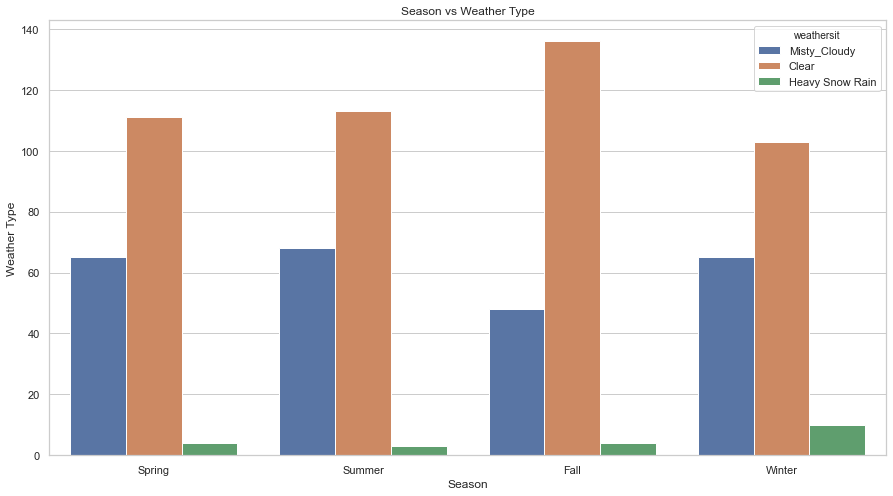

In [37]:
# Bivariate analysis for "season" "weathersit" variables.

plt.figure(figsize = (15, 8))
sns.countplot(x = "season", hue = "weathersit", data = days)
plt.xlabel("Season")
plt.ylabel("Weather Type")
plt.title("Season vs Weather Type")
plt.show()

Observation :

1. In each season mostly the whether type is Clear followed by Misty_Cloudy and Heavy Snow Rain. 

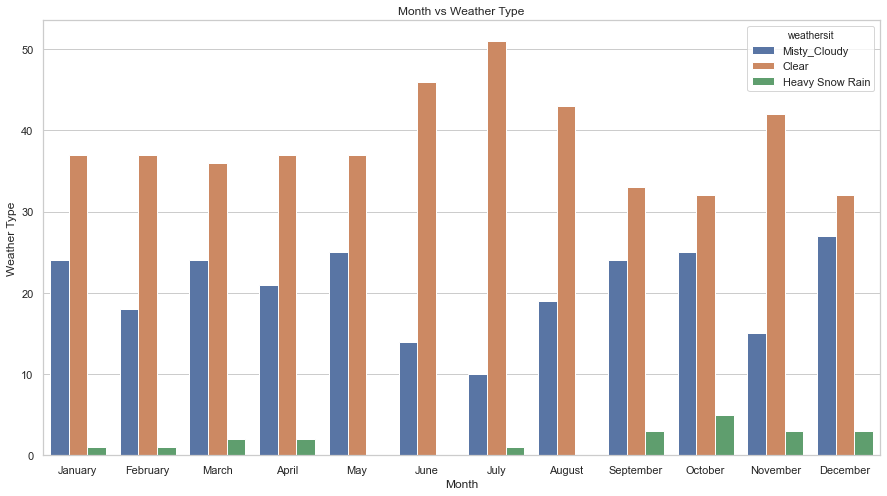

In [38]:
# Bivariate analysis for "mnth" "weathersit" variables.

plt.figure(figsize = (15, 8))
sns.countplot(x = "mnth", hue = "weathersit", data = days)
plt.xlabel("Month")
plt.ylabel("Weather Type")
plt.title("Month vs Weather Type")
plt.show()

Observation :

1. In every month mostly the wether type is Clear followed by Misty_Cloudy and Heavy snow rain.

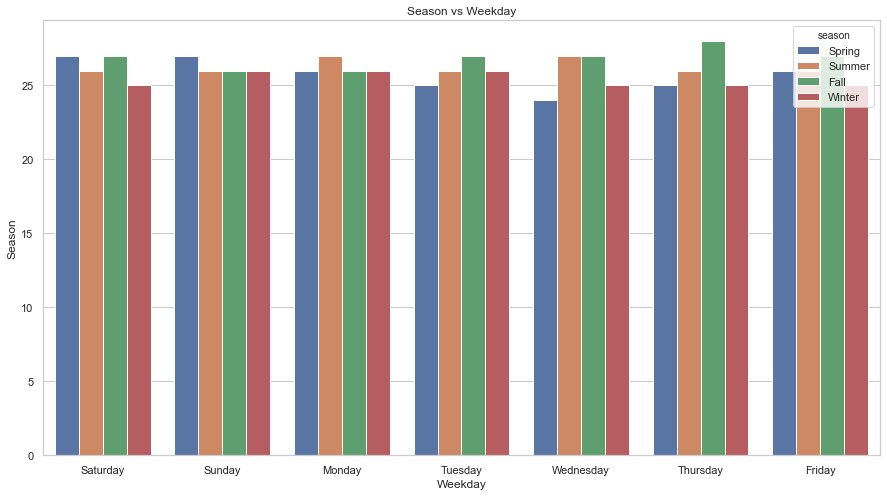

In [39]:
# Bivariate analysis for "Season" "weekday" variables.

plt.figure(figsize = (15, 8))
sns.countplot(x = "weekday", hue = "season", data = days)
plt.xlabel("Weekday")
plt.ylabel("Season")
plt.title("Season vs Weekday")
plt.show()

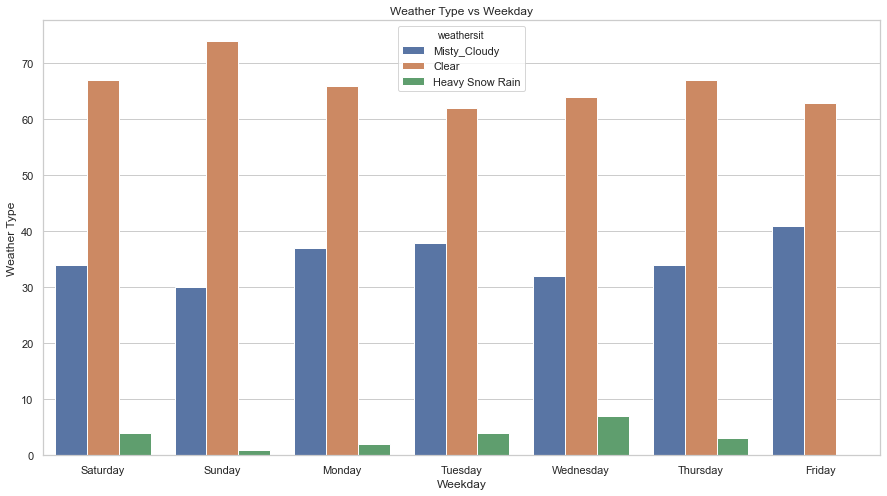

In [40]:
# Bivariate analysis for "weekday" "weathersit" variables.

plt.figure(figsize = (15, 8))
sns.countplot(x = "weekday", hue = "weathersit", data = days)
plt.xlabel("Weekday")
plt.ylabel("Weather Type")
plt.title("Weather Type vs Weekday")
plt.show()

Observation :

1. In every week mostly the wether type is Clear followed by Misty_Cloudy and Heavy snow rain.

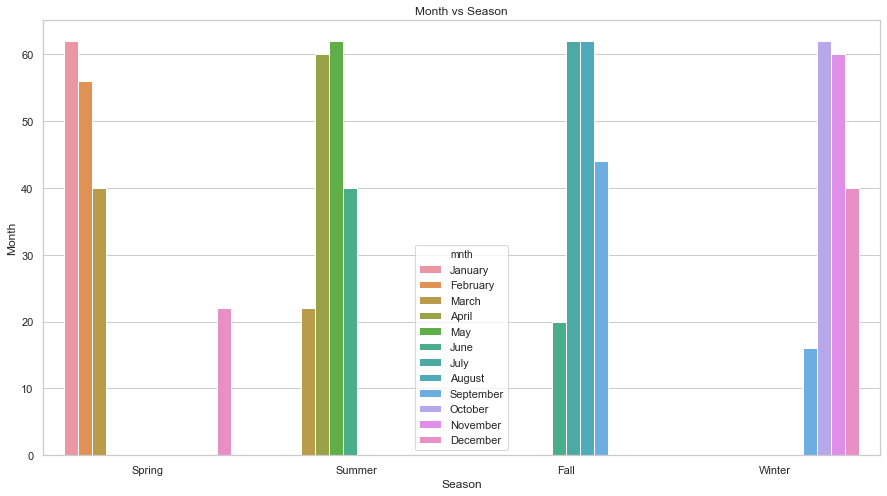

In [41]:
# Bivariate analysis for "season" "mnth" variables.

plt.figure(figsize = (15, 8))
sns.countplot(x = "season", hue = "mnth", data = days)
plt.xlabel("Season")
plt.ylabel("Month")
plt.title("Month vs Season")
plt.show()

### 3.2. Check correlation between various variables.

In [42]:
# Check correlation of features.

days.corr()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


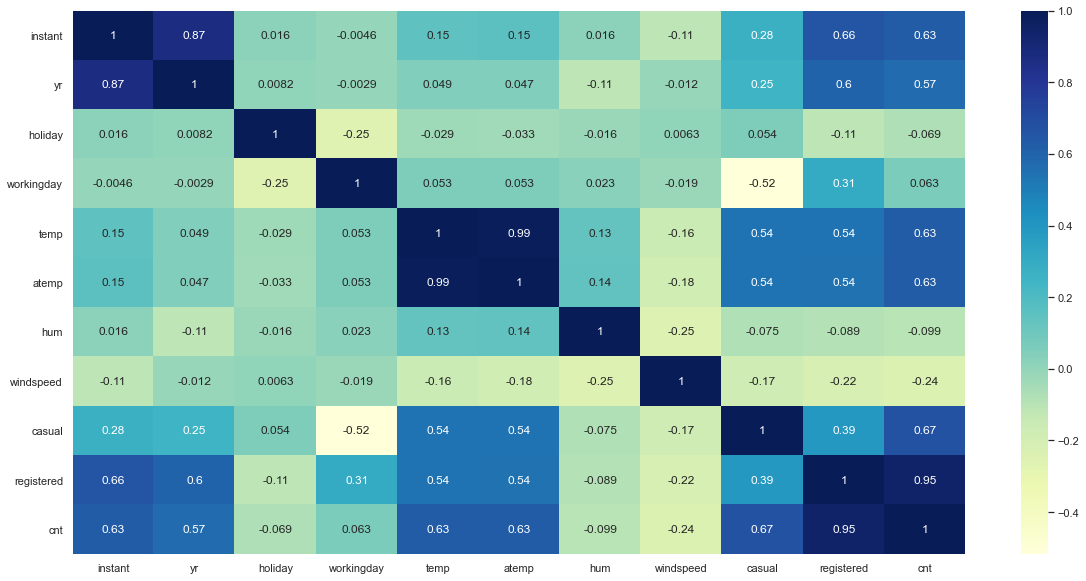

In [43]:
# Check correlation of variables using heatplot.

plt.figure(figsize = (20,10)) 
sns.heatmap(days.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [44]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


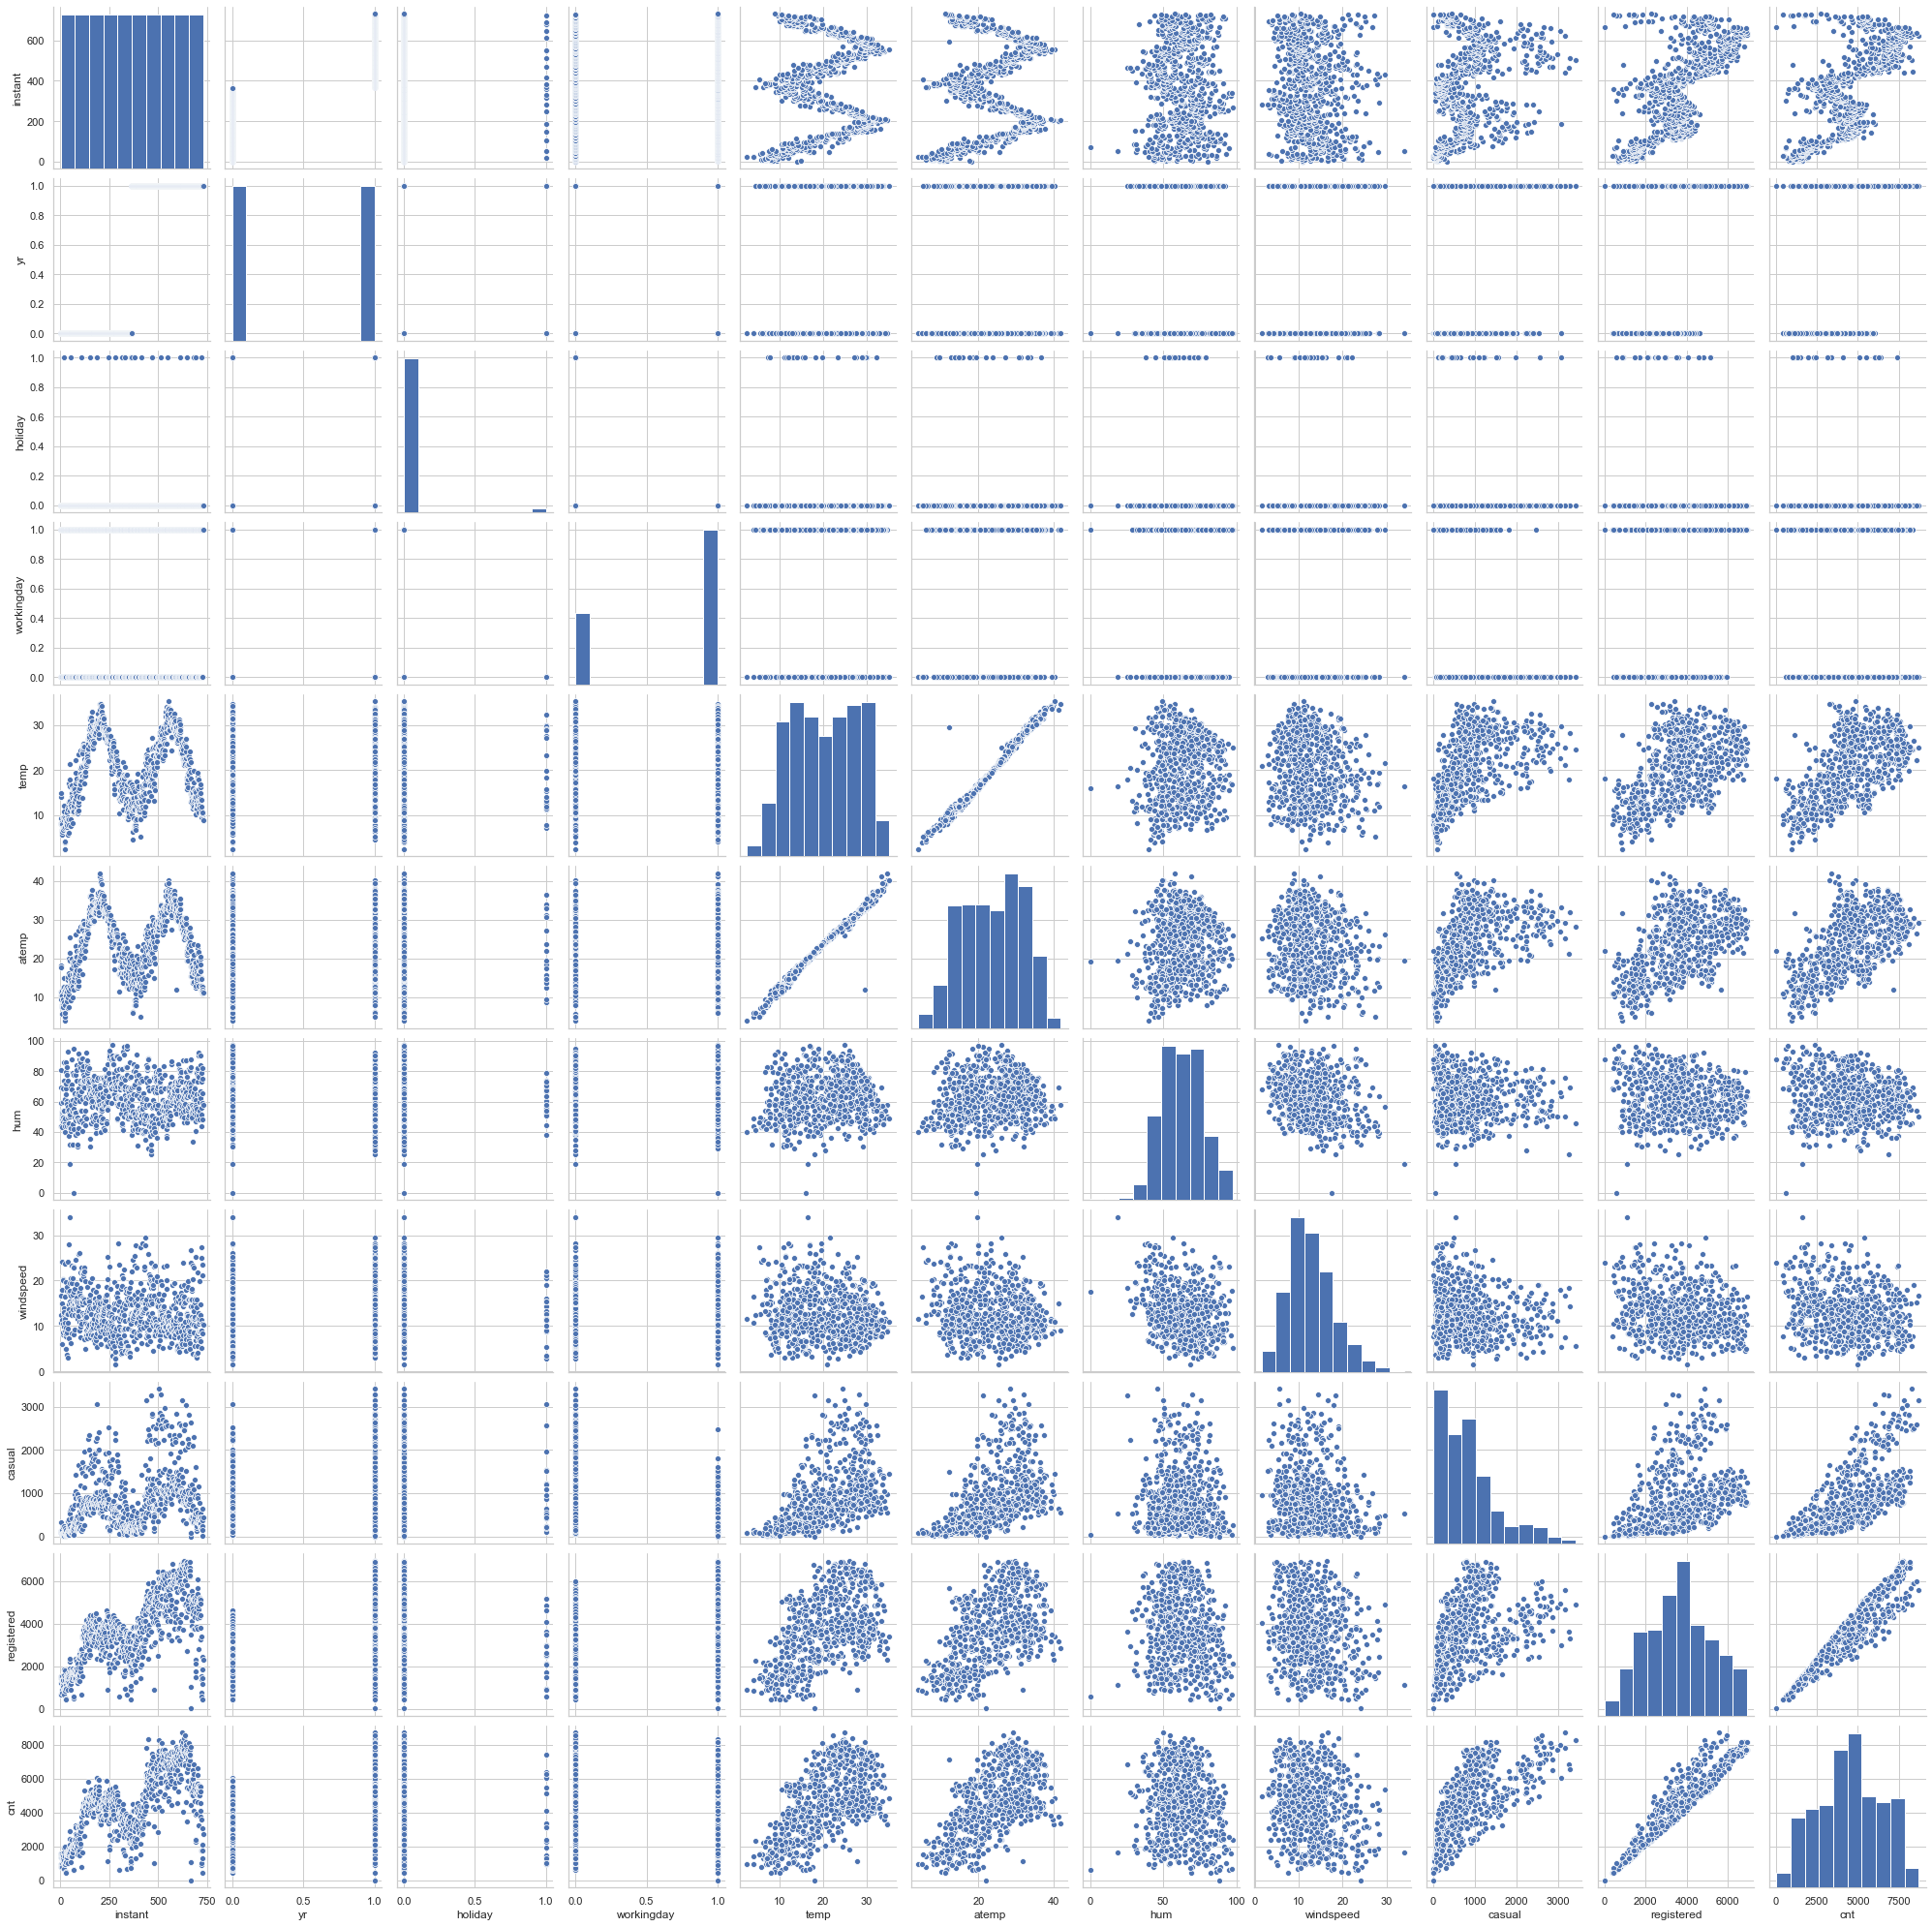

In [45]:
sns.pairplot(days)
plt.show()

## Step 4. Data Preparation I.

### 4.1. Identify the categorical and continous features.

In [46]:
# Identify the categorical and continuous features.

days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


### 4.2. Drop the unnecessary variables

#### Here we have "instant", "dteday", "temp", "casual", "registred" columns which have repeated or correlated data. So we have to drop it.

In [47]:
# Drop the unnecessary variables.

days.drop(["instant", "dteday", "temp", "casual", "registered"], axis = 1, inplace = True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


### 4.3. Check the data-type of all the columns and make necessary changes if required.

In [48]:
# Check the data-types of all the columns and make necessary changes if required.

days.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Step 5 : Data Preparation II.

### 5.1. Create dummy variables for all the categorical features.

####  1) "season" column dummy variables.

The variable `season` has four levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [49]:
# Create dummy variables for "season" variable.

status_1 = pd.get_dummies(days['season'])
status_1.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need four columns. You can drop the `season` column, as the type of furnishing can be identified with just the last three columns where — 
- `100` will correspond to `Spring`
- `010` will correspond to `Summer`
- `001` will correspond to `Winter`

In [50]:
# Drop first from these dummy varibles.

status_1 = pd.get_dummies(days['season'], drop_first = True)
days = pd.concat([days, status_1], axis = 1)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Saturday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Sunday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [51]:
# Drop the original "season" column and Check the dummy variables.

days.drop(['season'], axis = 1, inplace = True)
days.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Saturday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Sunday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0


#### 2) "mnth" column dummy variables.

The variable `mnth` has 12 levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [52]:
# Create dummy variables for "mnth" variable.

status_2 = pd.get_dummies(days['mnth'])
status_2.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Drop first from these dummy varibles.

status_2 = pd.get_dummies(days['mnth'], drop_first = True)
days = pd.concat([days, status_2], axis = 1)
days.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Saturday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Sunday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# Drop the original "mnth" column and Check the dummy variables.

days.drop(['mnth'], axis = 1, inplace = True)
days.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


#### 3) "weekday" column dummy variable.

The variable `weekday` has 7 levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [55]:
# Create dummy variables for "weekday" variable.

status_3 = pd.get_dummies(days['weekday'])
status_3.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [56]:
# Drop first from these dummy varibles.

status_3 = pd.get_dummies(days['weekday'], drop_first = True)
days = pd.concat([days, status_3], axis = 1)
days.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# Drop the original "weekday" column and Check the dummy variables.

days.drop(['weekday'], axis = 1, inplace = True)
days.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


#####  4) "weathersit" column dummy variable.

The variable `weathersit` has 3 levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [58]:
# Create dummy variables for "weathersit" variable.

status_4 = pd.get_dummies(days['weathersit'])
status_4.head()

,Clear,Heavy Snow Rain,Misty_Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [59]:
# Drop first from these dummy varibles.

status_4 = pd.get_dummies(days['weathersit'], drop_first = True)
days = pd.concat([days, status_4], axis = 1)
days.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
0,0,0,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,Clear,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
# Drop the original "weathersit" column and Check the dummy variables.

days.drop(['weathersit'], axis = 1, inplace = True)
days.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 5.2. Splitting the data into Train and Test set.

In [61]:
# We specify this so that the train and test data set always have the same rows, respectively.

days_train, days_test = train_test_split(days, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
# Check the shape of days_train and days_test

print(days_train.shape)
print(days_test.shape)

(510, 29)
(219, 29)


### 5.3. Rescalling the features. (Scalling the "days_train" dataset.)

We will use Min Max Scalling.

In [63]:
# create the object of MinMaxScaler().

scaler = MinMaxScaler()

In [64]:
# Check the top 5 records of days_train.

days_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [65]:
# Apply scaler() to all the columns except binary variables and dummy variables.

numerical_vars = ["atemp", "hum", "windspeed", "cnt"]
days_train[numerical_vars] = scaler.fit_transform(days_train[numerical_vars])
days_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
# Describe the days_train dataframe. 

days_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


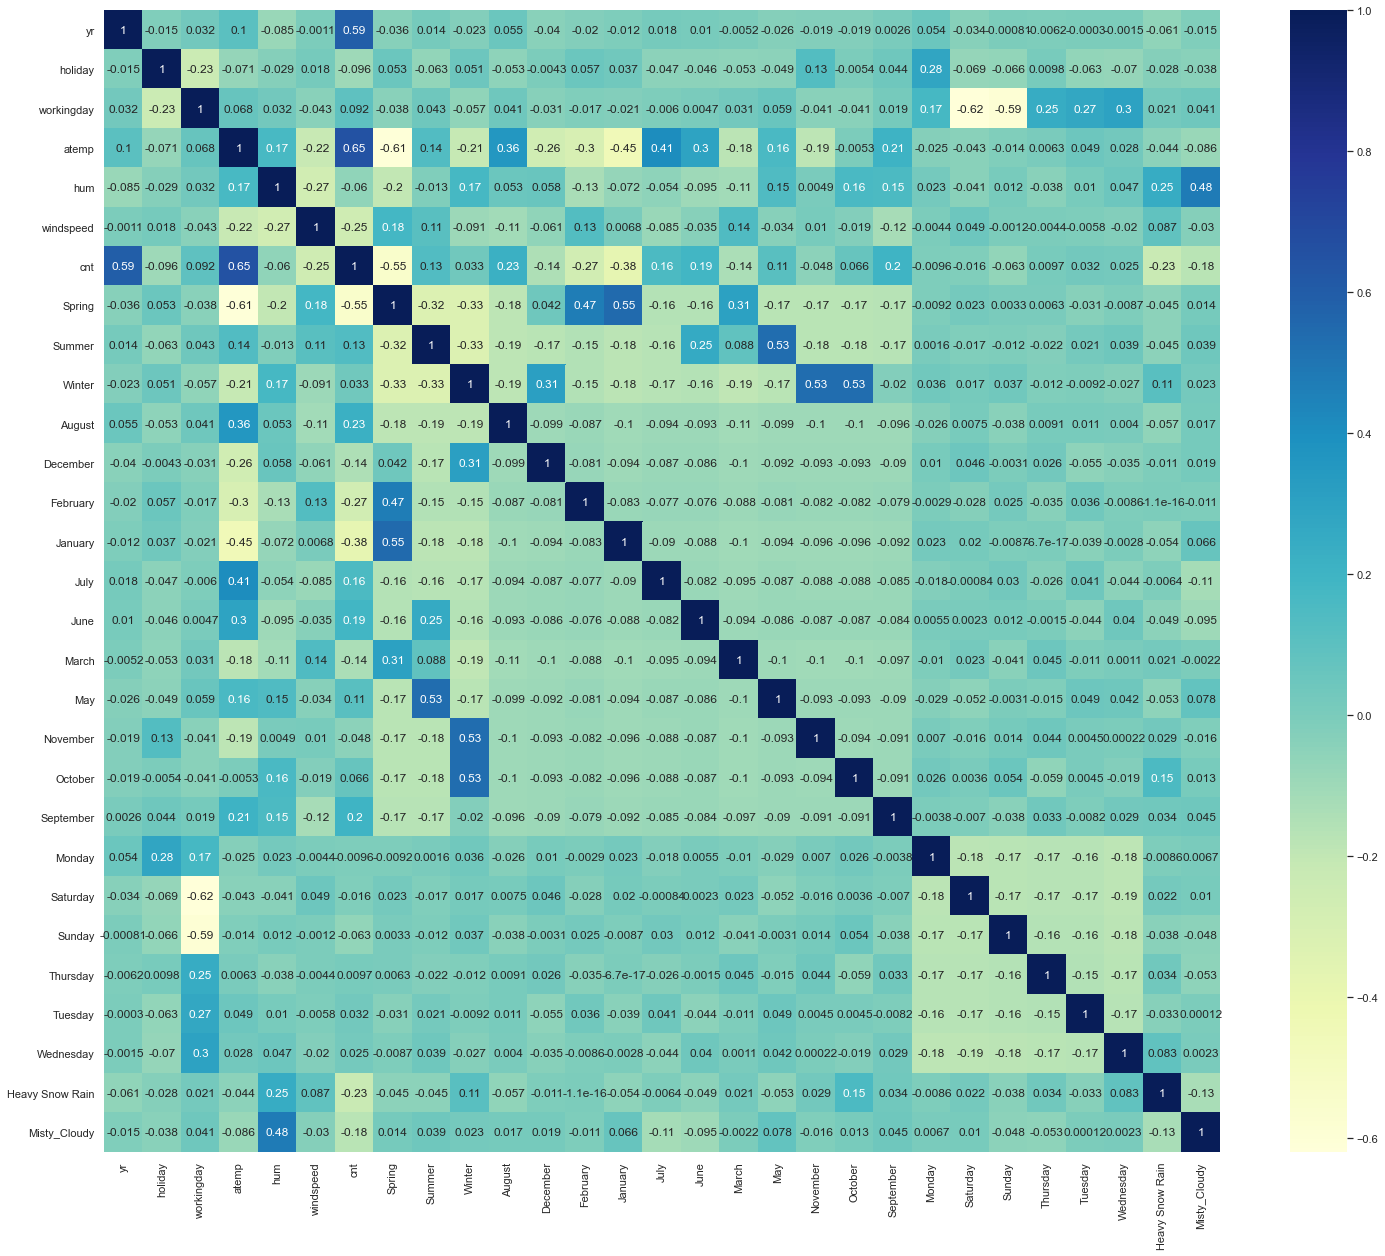

In [67]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 21))
sns.heatmap(days_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 5.4. Dividing into X and y sets for the model building

In [68]:
# Divide the days_train into y_train and X_train.

y_train = days_train.pop("cnt")
X_train = days_train

## Step 6 : Data Modelling and Evaluation (Building our model).

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### 6.1. Create linear regression model using mixed approach

### 6.1.1. Use RFE to get columns which are suitable for model.

In [69]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  
rfe = rfe.fit(X_train, y_train)

In [70]:
# List the columns and its result of RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 5),
 ('Winter', True, 1),
 ('August', False, 6),
 ('December', True, 1),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('March', False, 14),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Heavy Snow Rain', True, 1),
 ('Misty_Cloudy', True, 1)]

In [71]:
# Get the columns which are suggested by RFE as True.

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter',
       'December', 'January', 'July', 'November', 'September', 'Saturday',
       'Heavy Snow Rain', 'Misty_Cloudy'],
      dtype='object')

In [72]:
# Get the columns which are suggested by RFE as False.

X_train.columns[~rfe.support_]

Index(['workingday', 'Summer', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [73]:
X_train_rfe_col = X_train[col]

### 6.1.2. Building model using statsmodel, for the detailed statistics

### Model - 1 - Dropping the Variable and Updating the Model 

In [74]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [75]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [76]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()   

In [77]:
# Print the summary of model.

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.67e-187
Time:                        19:27:07   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3662      0.032     11.425      0.000       0.303       0.429
yr                  0.2326      0.008     28.490      0.000       0.217       0.249
holiday            -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp               0.4470      0.035     12.826      0.000       0.379       0.515
hum                -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed          -0.1692      0.026     -6.498      0.000      -0.220      -0.118
Spring             -0.1070      0.015     -6.974      0.000      -0.137      -0.077
Winter              0.0662      0.014      4.703      0.000       0.039       0.094
December           -0.0485      0.017     -2.791      0.005      -0.083      -0.014
January            -0.0515      0.018     -2.836      0.005      -0.087      -0.016
July               -0.0679      0.017     -3.935      0.000      -0.102      -0.034
November           -0.0502      0.019     -2.689      0.007      -0.087      -0.014
September           0.0586      0.016      3.751      0.000       0.028       0.089
Saturday            0.0182      0.011      1.627      0.104      -0.004       0.040
Heavy Snow Rain    -0.2504      0.027     -9.381      0.000      -0.303      -0.198
Misty_Cloudy       -0.0582      0.011     -5.501      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now delete the columns using VIF or P-value to get better model. (Mixed approach)

#### From summary of previous created model the P-value of "Saturday" column is high so we need to remove it.

In [78]:
# Dropping highly correlated variables and insignificant variables.

X_train_rfe = X_train_rfe.drop(["Saturday"], axis = 1)

#### Rebuild the model after removing "Saturday" column.

### Model - 2 - Dropping the Variable and Updating the Model

In [79]:
# Adding a constant variable. 

X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
# Running the linear model.

lm_2 = sm.OLS(y_train,X_train_rfe).fit()   

In [81]:
#Let's see the summary of our linear model.

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.58e-187
Time:                        19:27:08   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3704      0.032     11.578      0.000       0.308       0.433
yr                  0.2321      0.008     28.403      0.000       0.216       0.248
holiday            -0.0871      0.026     -3.359      0.001      -0.138      -0.036
atemp               0.4470      0.035     12.806      0.000       0.378       0.516
hum                -0.1510      0.038     -3.961      0.000      -0.226      -0.076
windspeed          -0.1677      0.026     -6.435      0.000      -0.219      -0.117
Spring             -0.1070      0.015     -6.961      0.000      -0.137      -0.077
Winter              0.0667      0.014      4.732      0.000       0.039       0.094
December           -0.0475      0.017     -2.729      0.007      -0.082      -0.013
January            -0.0509      0.018     -2.799      0.005      -0.087      -0.015
July               -0.0676      0.017     -3.911      0.000      -0.102      -0.034
November           -0.0506      0.019     -2.704      0.007      -0.087      -0.014
September           0.0589      0.016      3.769      0.000       0.028       0.090
Heavy Snow Rain    -0.2490      0.027     -9.317      0.000      -0.301      -0.196
Misty_Cloudy       -0.0576      0.011     -5.435      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       68.422   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.422
Skew:                          -0.657   Prob(JB):                     2.00e-41
Kurtosis:                       5.663   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the VIF for this model.

In [82]:
# Calculate the VIFs for the new model.

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.326
3,atemp,3.393
6,Spring,2.687
7,Winter,2.295
4,hum,1.910
11,November,1.704
9,January,1.647
14,Misty_Cloudy,1.566
8,December,1.444
10,July,1.303


#### From summary of previous created model the VIF value of "atemp" column is high so we need to remove it.

In [83]:
# Dropping highly correlated variables and insignificant variables.

X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)

#### Rebuild the model after removing "atemp" column.

### Model - 3 - Dropping the Variable and Updating the Model

In [84]:
# Adding a constant variable.

X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
# Running the linear model.

lm = sm.OLS(y_train,X_train_rfe).fit()   

In [86]:
# Let's see the summary of our linear model.

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.24e-158
Time:                        19:27:08   Log-Likelihood:                 434.51
No. Observations:                 510   AIC:                            -841.0
Df Residuals:                     496   BIC:                            -781.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5854      0.031     18.647      0.000       0.524       0.647
yr                  0.2457      0.009     26.308      0.000       0.227       0.264
holiday            -0.0857      0.030     -2.868      0.004      -0.144      -0.027
hum                -0.0264      0.042     -0.620      0.535      -0.110       0.057
windspeed          -0.2095      0.030     -7.028      0.000      -0.268      -0.151
Spring             -0.2179      0.015    -14.891      0.000      -0.247      -0.189
Winter              0.0081      0.015      0.527      0.599      -0.022       0.038
December           -0.1075      0.019     -5.568      0.000      -0.145      -0.070
January            -0.1207      0.020     -6.034      0.000      -0.160      -0.081
July                0.0130      0.019      0.700      0.484      -0.023       0.049
November           -0.0979      0.021     -4.634      0.000      -0.139      -0.056
September           0.0796      0.018      4.440      0.000       0.044       0.115
Heavy Snow Rain    -0.3048      0.030    -10.031      0.000      -0.365      -0.245
Misty_Cloudy       -0.0857      0.012     -7.169      0.000      -0.109      -0.062
==============================================================================
Omnibus:                       57.728   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.122
Skew:                          -0.629   Prob(JB):                     6.76e-28
Kurtosis:                       5.074   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Calculate the VIFs for the new model.

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.892
6,Winter,2.053
5,Spring,1.834
3,hum,1.786
10,November,1.637
8,January,1.500
13,Misty_Cloudy,1.498
7,December,1.339
12,Heavy Snow Rain,1.228
4,windspeed,1.190


#### From summary of previous created model the P-value and VIF value of "Winter" column is high so we need to remove it.

In [88]:
# Dropping highly correlated variables and insignificant variables.

X_train_rfe = X_train_rfe.drop(["Winter"], axis = 1)

#### Rebuild the model after removing "Winter" column.

### Model - 3 - Dropping the Variable and Updating the Model

In [89]:
# Adding a constant variable.

X_train_rfe = sm.add_constant(X_train_rfe)

In [90]:
# Running the linear model.

lm = sm.OLS(y_train,X_train_rfe).fit()   

In [91]:
# Let's see the summary of our linear model.

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          7.46e-159
Time:                        19:27:09   Log-Likelihood:                 434.37
No. Observations:                 510   AIC:                            -842.7
Df Residuals:                     497   BIC:                            -787.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5862      0.031     18.701      0.000       0.525       0.648
yr                  0.2458      0.009     26.331      0.000       0.227       0.264
holiday            -0.0857      0.030     -2.871      0.004      -0.144      -0.027
hum                -0.0246      0.042     -0.581      0.561      -0.108       0.059
windspeed          -0.2099      0.030     -7.052      0.000      -0.268      -0.151
Spring             -0.2202      0.014    -15.800      0.000      -0.248      -0.193
December           -0.1029      0.017     -5.972      0.000      -0.137      -0.069
January            -0.1200      0.020     -6.017      0.000      -0.159      -0.081
July                0.0113      0.018      0.617      0.537      -0.025       0.047
November           -0.0915      0.017     -5.276      0.000      -0.126      -0.057
September           0.0795      0.018      4.436      0.000       0.044       0.115
Heavy Snow Rain    -0.3033      0.030    -10.035      0.000      -0.363      -0.244
Misty_Cloudy       -0.0858      0.012     -7.186      0.000      -0.109      -0.062
==============================================================================
Omnibus:                       56.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.011
Skew:                          -0.619   Prob(JB):                     1.44e-26
Kurtosis:                       5.016   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Calculate the VIFs for the new model.

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.805
3,hum,1.775
5,Spring,1.666
12,Misty_Cloudy,1.498
7,January,1.493
11,Heavy Snow Rain,1.216
4,windspeed,1.189
9,November,1.107
10,September,1.106
8,July,1.096


#### From summary of previous created model the P-value of "hum" column is high so we need to remove it.

In [93]:
# Dropping highly correlated variables and insignificant variables.

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

#### Rebuild the model after removing "hum" column.

### Model - 4 - Dropping the Variable and Updating the Model

In [94]:
# Adding a constant variable.

X_train_rfe = sm.add_constant(X_train_rfe)

In [95]:
# Running the linear model.

lm = sm.OLS(y_train,X_train_rfe).fit()   

In [96]:
# Let's see the summary of our linear model.

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          6.64e-160
Time:                        19:27:10   Log-Likelihood:                 434.19
No. Observations:                 510   AIC:                            -844.4
Df Residuals:                     498   BIC:                            -793.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5696      0.013     44.153      0.000       0.544       0.595
yr                  0.2462      0.009     26.483      0.000       0.228       0.264
holiday            -0.0859      0.030     -2.880      0.004      -0.145      -0.027
windspeed          -0.2048      0.028     -7.211      0.000      -0.261      -0.149
Spring             -0.2189      0.014    -15.917      0.000      -0.246      -0.192
December           -0.1034      0.017     -6.018      0.000      -0.137      -0.070
January            -0.1200      0.020     -6.022      0.000      -0.159      -0.081
July                0.0117      0.018      0.640      0.522      -0.024       0.047
November           -0.0913      0.017     -5.269      0.000      -0.125      -0.057
September           0.0786      0.018      4.406      0.000       0.044       0.114
Heavy Snow Rain    -0.3100      0.028    -11.122      0.000      -0.365      -0.255
Misty_Cloudy       -0.0896      0.010     -9.014      0.000      -0.109      -0.070
==============================================================================
Omnibus:                       56.073   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.305
Skew:                          -0.619   Prob(JB):                     1.24e-26
Kurtosis:                       5.021   Cond. No.                         8.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Calculate the VIFs for the new model.

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.768
4,Spring,1.625
6,January,1.493
8,November,1.106
9,September,1.099
7,July,1.094
3,windspeed,1.083
5,December,1.065
11,Misty_Cloudy,1.040
10,Heavy Snow Rain,1.036


#### From summary of previous created model the P-value of "July" column is high so we need to remove it.

In [98]:
# Dropping highly correlated variables and insignificant variables.

X_train_rfe = X_train_rfe.drop(["July"], axis = 1)

#### Rebuild the model after removing "July" column.

### Model - 5 - Dropping the Variable and Updating the Model

In [99]:
# Adding a constant variable.

X_train_rfe = sm.add_constant(X_train_rfe)

In [100]:
# Running the linear model.

lm = sm.OLS(y_train,X_train_rfe).fit()   

In [101]:
# Let's see the summary of our linear model.

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.82e-161
Time:                        19:27:11   Log-Likelihood:                 433.99
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5719      0.012     46.206      0.000       0.548       0.596
yr                  0.2462      0.009     26.500      0.000       0.228       0.264
holiday            -0.0862      0.030     -2.892      0.004      -0.145      -0.028
windspeed          -0.2062      0.028     -7.287      0.000      -0.262      -0.151
Spring             -0.2202      0.014    -16.201      0.000      -0.247      -0.194
December           -0.1047      0.017     -6.132      0.000      -0.138      -0.071
January            -0.1203      0.020     -6.037      0.000      -0.159      -0.081
November           -0.0929      0.017     -5.419      0.000      -0.127      -0.059
September           0.0770      0.018      4.362      0.000       0.042       0.112
Heavy Snow Rain    -0.3103      0.028    -11.140      0.000      -0.365      -0.256
Misty_Cloudy       -0.0903      0.010     -9.149      0.000      -0.110      -0.071
==============================================================================
Omnibus:                       56.606   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.699
Skew:                          -0.624   Prob(JB):                     6.17e-27
Kurtosis:                       5.031   Cond. No.                         8.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Calculate the VIFs for the new model.

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.160
4,Spring,1.589
6,January,1.492
7,November,1.083
3,windspeed,1.077
8,September,1.076
5,December,1.052
9,Heavy Snow Rain,1.035
2,holiday,1.032
10,Misty_Cloudy,1.027


#### So now Model - 5 has all featues with lowest P-value and VIF value of features less than 2 and R-squared value of Model - 5 is 78.8 and Adjusted R-squared value is 78.4 which is good model.

### 6.2. Check the various assumptions.

### 6.2.1. Assumption_1 - Error terms are normally distributed with mean zero

In [103]:
y_train_predict = lm.predict(X_train_rfe)

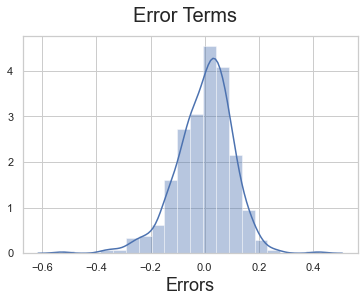

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

### 6.2.2. Assumption_2 - Error terms are independent of each other.

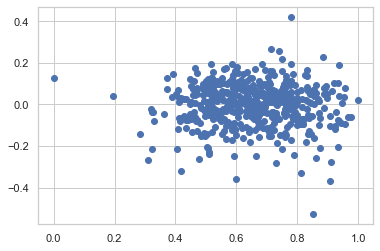

In [105]:
res = y_train - y_train_predict
plt.scatter(X_train["hum"],res)
plt.show()

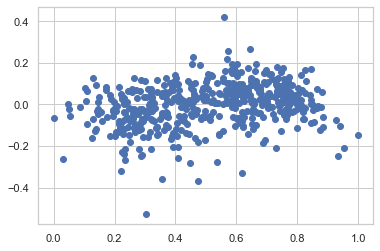

In [106]:
res_2 = y_train - y_train_predict
plt.scatter(X_train["atemp"],res_2)
plt.show()

### 6.2.3. Assumption_3 - Little or no Multicollinearity between the features.

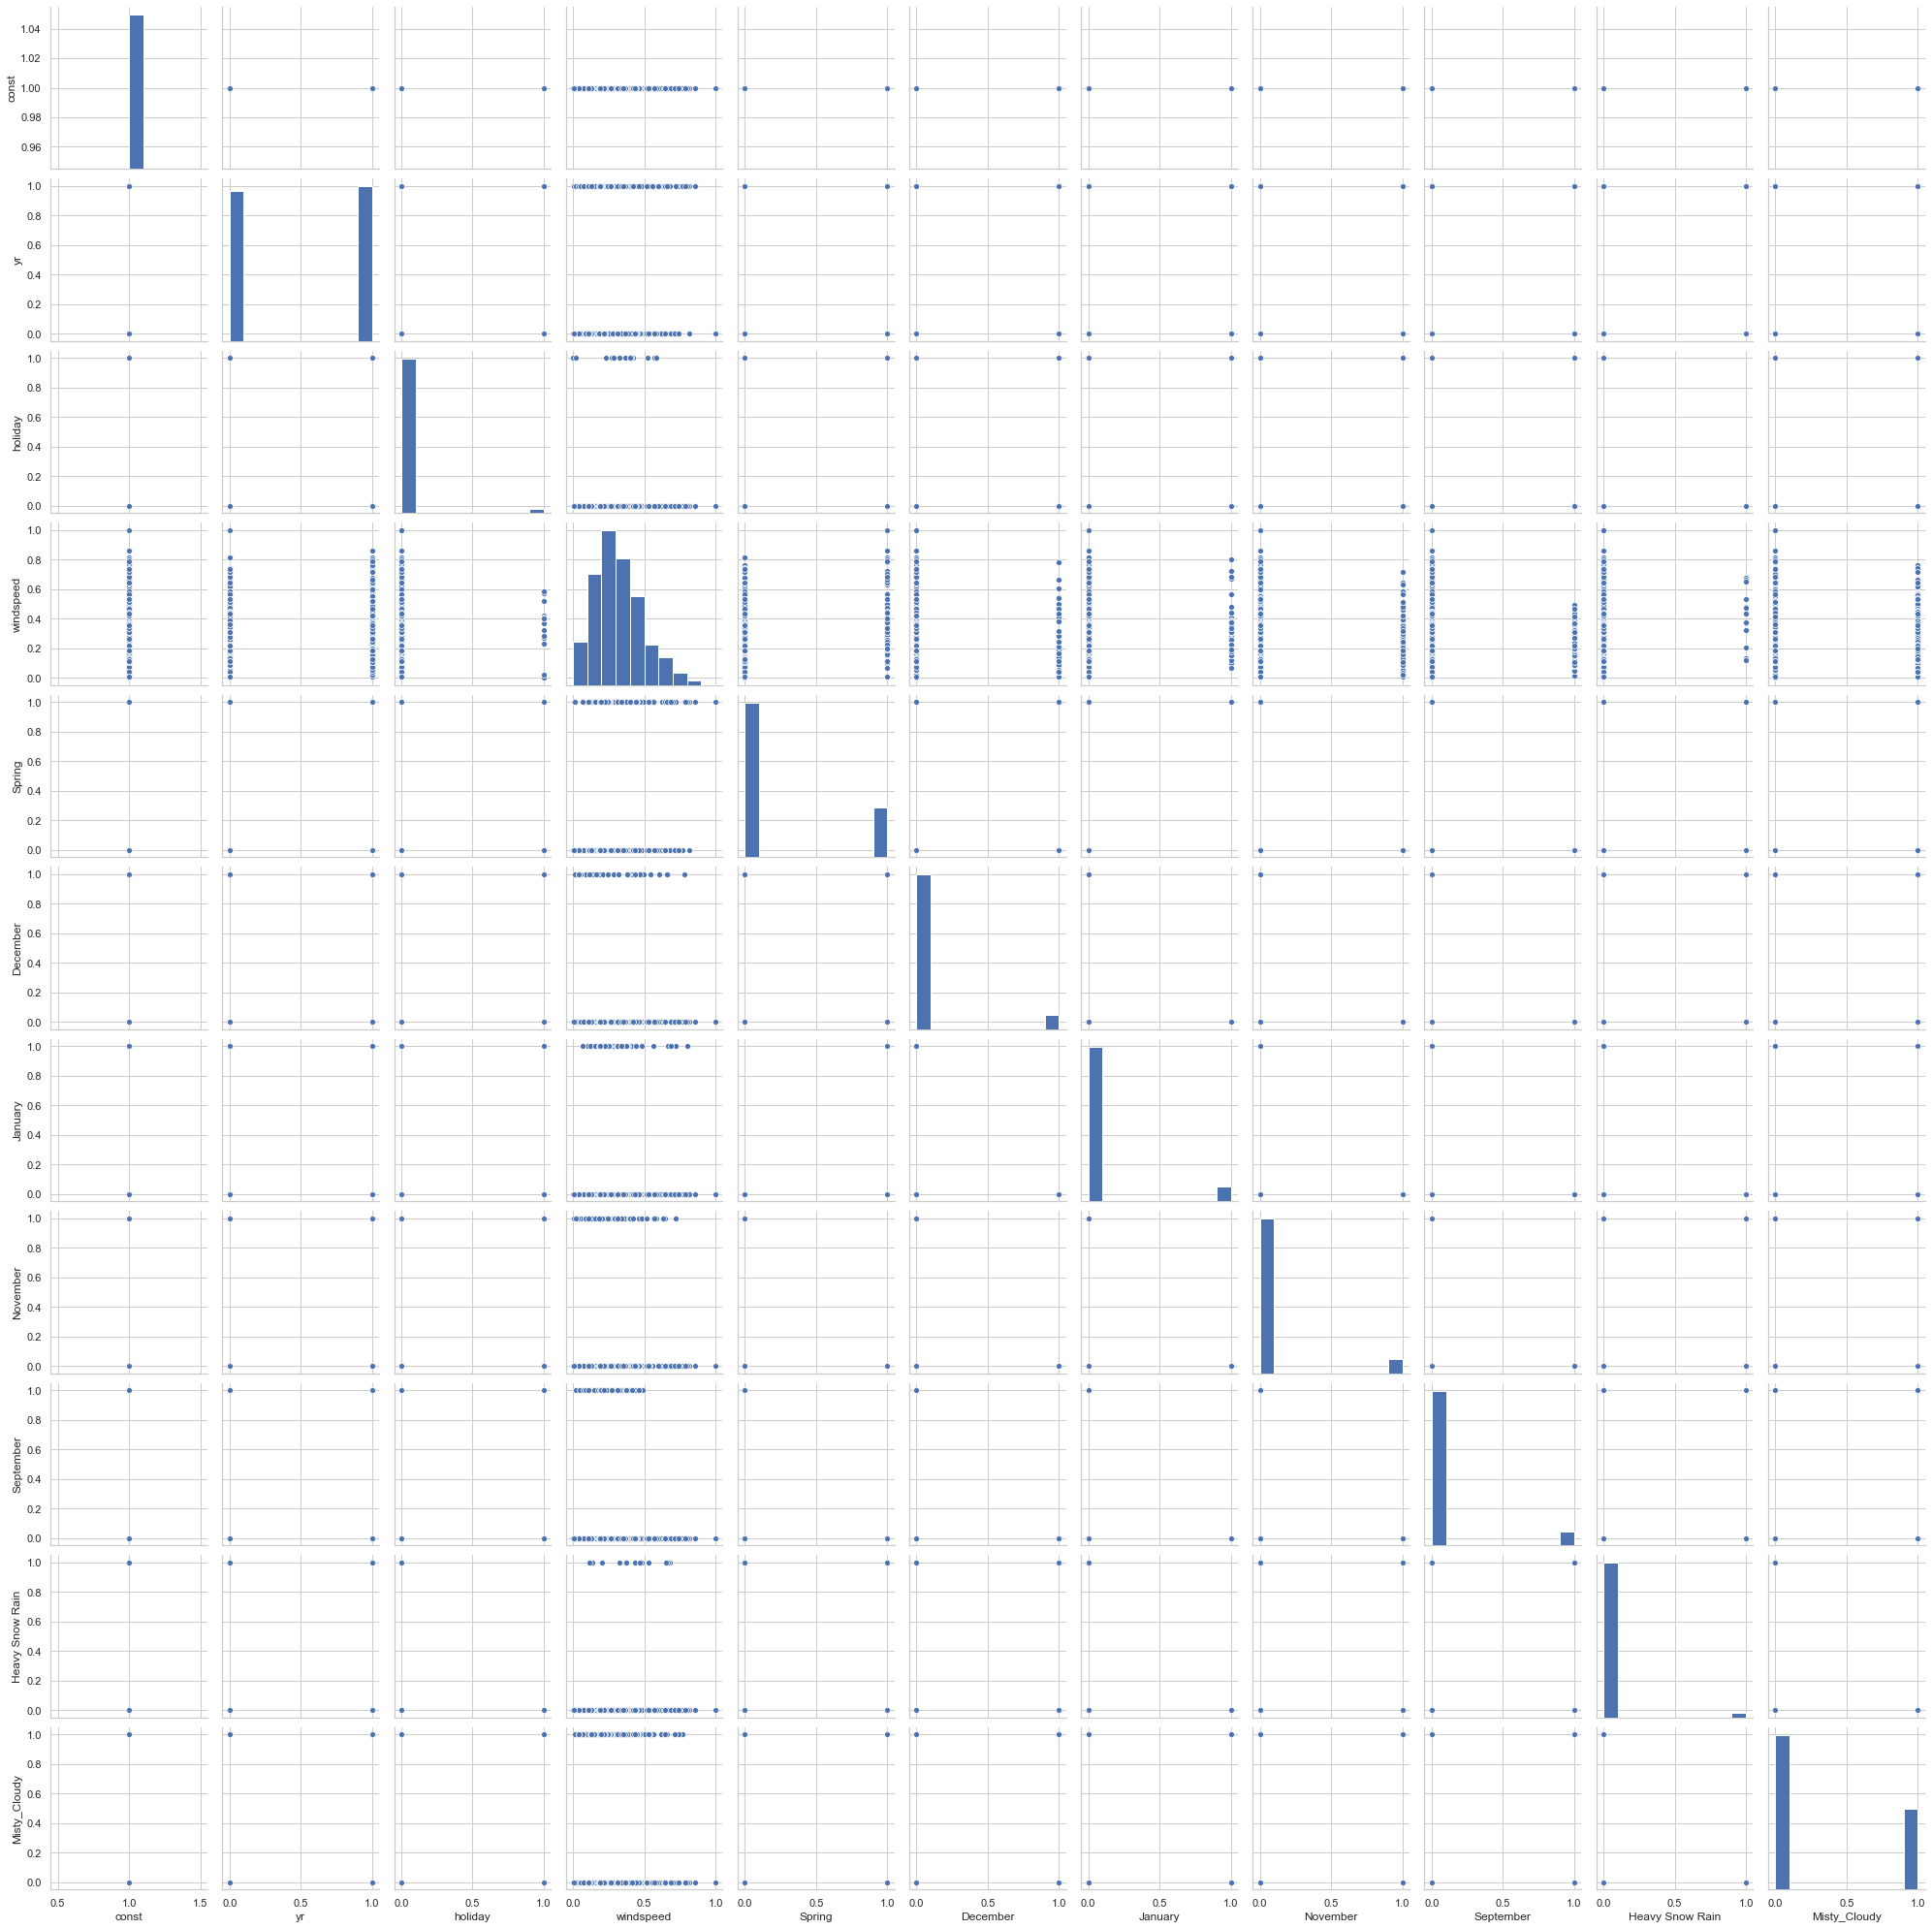

In [107]:
# Showing little or no Multicollinearity between the features.

sns.pairplot(X_train_rfe)
plt.show()

### 6.3. Making Predictions.

#### Before making prediction we need to scale the test data.

### 6.3.1. Apply the scalling on test sets.

In [108]:
# Check the top 5 records of days_test.

days_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [109]:
# Apply scaler() to all the columns except binary variables and dummy variables.

numerical_var = ["atemp", "hum", "windspeed", "cnt"]
days_test[numerical_var] = scaler.transform(days_test[numerical_var])
days_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
# Describe the days_test dataframe. 

days_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6.3.2. Divide the data in X_test and y_test

In [111]:
# Divide the days_train into y_train and X_train.

y_test = days_test.pop("cnt")
X_test = days_test

In [112]:
X_test.shape

(219, 28)

In [113]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Heavy Snow Rain,Misty_Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [114]:
X_train_rfe = X_train_rfe.drop('const', 1)

In [115]:
X_train_rfe.columns

Index(['yr', 'holiday', 'windspeed', 'Spring', 'December', 'January',
       'November', 'September', 'Heavy Snow Rain', 'Misty_Cloudy'],
      dtype='object')

In [116]:
# Creating X_test_new dataframe by dropping varibales form X_test.

X_test_new = X_test[X_train_rfe.columns]

In [117]:
# Now let's use our model to make predictions.

# Adding a constant variable 

X_test_new = sm.add_constant(X_test_new)

In [118]:
# Making predictions

y_pred = lm.predict(X_test_new)

### 6.3.3. Model Evaluation.

Text(0, 0.5, 'y_pred')

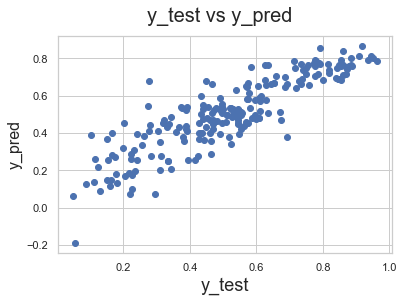

In [119]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### 6.4. Check the adjusted R-Square for both test and train data. 

#### Adjusted R-squared = 1 - ((1-R-squared)*(N-1))/(N-P-1)
###### Where, N = Number of records, P = Number of predictors

#### Calculate R-Square for test data.

In [120]:
# Calculating the R-square value for test data

r_squared_test_data = r2_score(y_test, y_pred)
r_squared_test_data

0.7692911456361968

#### In test data we have number of features = 10 and number of records = 219

In [121]:
Adjusted_R_Squ_Test_Data = (1 - ((1 - 0.769291) * (219 - 1)) / (219 - 10 - 1))
Adjusted_R_Squ_Test_Data

0.7581992211538461

#### Adjusted R - Square of train data = 78.4
#### Adjusted R - Square of test data = 75.81

### 6.5. Report the final model.
#### We have to report top 5 features which affects the model based on coefficient.

In [122]:
lm.params

const              0.571863
yr                 0.246198
holiday           -0.086209
windspeed         -0.206191
Spring            -0.220218
December          -0.104683
January           -0.120262
November          -0.092932
September          0.076974
Heavy Snow Rain   -0.310308
Misty_Cloudy      -0.090342
dtype: float64

#### Top 5 features in this model are:
1. Heavy Snow Rain
2. yr
3. Spring
4. Windspeed
5. January